## ***Overview of the notebook***

**What is the notebook about?**

In general, this notebook will show you about data analysis and vizualization of Airbnb listings and metrics in NYC, NY for 2019. We can learn about different hosts and areas. Which hosts are the busiest and why? The analysis will give us understanding of customers - host behavior and performance on the platform, guiding market initiatives and much more. 

## ***Data Source***

This dataset is obtained from kaggle.com. It has 48895-row data with 16 columns.

## ***Loading Data***

In [1]:
# import library what will be needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
# loading the csv file into pandas dataframe
airbnb = pd.read_csv('AB_NYC_2019.csv')

In [3]:
# check the head to get the brief overview of the data
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# figure out the size of the dataset
len(airbnb)

48895

In [5]:
# check the data types for each column
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

After loading dataset, we can see that there are some missing values in the dataset which require cleaning and handling of the NaN values.

## ***Cleaning and Handling of Missing Data***

In [7]:
# which column that has NaN values?
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

When dealing with missing data, the first easy step is separating the columns that has NaN values into relevant and irrelevant to our data analysis. We can drop 'host_name' because it is insignificant but also for ethical reason. After some reading, we know that 'last_review' is missing because there is no reviews yet for the Airbnb. In our case this column isn't relevan and can be dropped. Meanwhile for 'reviews per month', the reson of missing values is similar form 'last_review'. Following the logic, if there is 0 reviews there will be 0.0 rate of reviews per month. So, let's remove irrelevant columns and handling of missing data.

In [8]:
# drop irrelevant columns to our analysis
airbnb.drop(['id','host_name','last_review'], inplace=True, axis=1)

In [9]:
airbnb.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [10]:
# fill the NaN values in 'reviews_per_month' column with 0 value
airbnb.fillna({'reviews_per_month':0}, inplace=True)
airbnb['reviews_per_month'].isnull().sum()

0

Examining the unique value of our categorical columns is an important step in the data exploration. It will help us to understand what kind of analysis that can be done later. 

In [12]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [14]:
len(airbnb['neighbourhood'].unique())

221

In [15]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## ***Data Vizualization***

In [16]:
# get the top 10 hosts
top_host = airbnb['host_id'].value_counts().head(10)

In [17]:
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [18]:
# validate the top host
airbnb['calculated_host_listings_count'].max()

327

In [19]:
# set the base setting of our vizualization
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [20]:
type(top_host)

pandas.core.series.Series

In [23]:
# transform the pandas series into pandas dataframe for further vizualization
top_host_df = pd.DataFrame(top_host)
top_host_df.head()

,host_id
219517861,327
107434423,232
30283594,121
137358866,103
12243051,96


In [24]:
top_host_df.reset_index(inplace=True)

In [25]:
top_host_df.head()

,index,host_id
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96


In [26]:
top_host_df.rename(columns={'index':'Host_ID','host_id':'P_Count'}, inplace=True)
top_host_df.head()

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

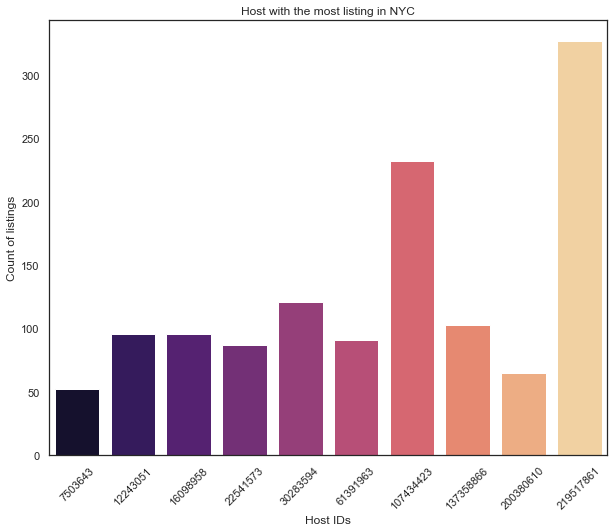

In [30]:
# create a bar plot to compare the listing count between top 10 hosts
viz_1 = sns.barplot(x='Host_ID',y='P_Count',data=top_host_df,palette='magma')
viz_1.set_title('Host with the most listing in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(),rotation=45)

In [70]:
# seperate price data based on neighbourhood group to understand the distribution
sub_1 = airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub1 = sub_1[['price']]

sub_2 = airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2 = sub_2[['price']]

sub_3 = airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub3 = sub_3[['price']]

sub_4 = airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4 = sub_4[['price']]

sub_5 = airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub5 = sub_5[['price']]

# create a list that save all of the different price dataframes
price_list_by_n = [price_sub1,price_sub2,price_sub3,price_sub4,price_sub5]

In [71]:
# we want to create a statistic summary of price for each neighbourhood group as follow
price_list_by_n[0].describe(percentiles=[.25,.50,.75])

,price
count,20104.000000
mean,124.383207
std,186.873538
min,0.000000
25%,60.000000
50%,90.000000
75%,150.000000
max,10000.000000


In [72]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [73]:
# create an empty list to store statistical summary of each neighbourhood group
p_l_b_n_2 = []
# create a list to change the column name at the end of the calculation
nei_list = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

# calculation pricess to get the statistical summary
for x in price_list_by_n:
    i = x.describe(percentiles=[.25,.50,.75])
    i = i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)

In [74]:
# rename the column
for i in list(range(0,5)):
    p_l_b_n_2[i].rename(columns={'price':nei_list[i]},inplace=True)

In [75]:
# join each dataframe into one
stat_df = p_l_b_n_2
stat_df = [df.set_index('Stats') for df in stat_df]
stat_df = stat_df[0].join(stat_df[1:])

In [76]:
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


Text(0.5, 1.0, 'Density and distibution of prices fir each neighbourhood_group')

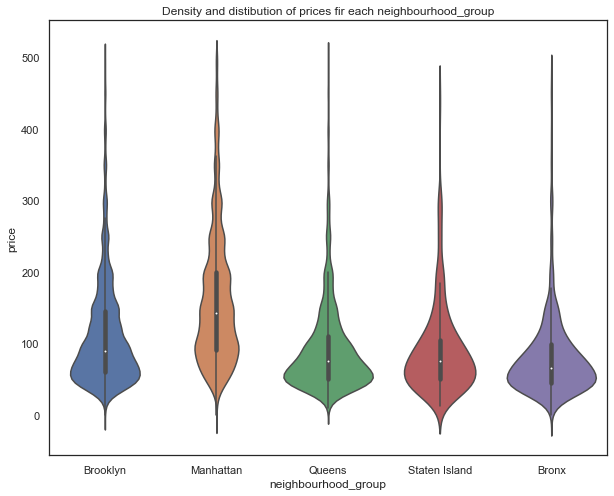

In [78]:
# from the statistical summary table we know that there are outliers in our data
# so we must eliminate first
sub_6 = airbnb[airbnb['price'] < 500]
# create violin plot to show the distibution for each neighbourhood group
viz_2 = sns.violinplot(x='neighbourhood_group',y='price',data=sub_6)
viz_2.set_title('Density and distibution of prices fir each neighbourhood_group')

From our statictical table and violin plot, we can get several information. First, Manhattan has the highest range of prices with average around \\$150 per night, followed by Brooklyn with \\$90 per night. Queens and Staten Island have similar price distribution and Bronx is the cheapest from all of them. If we refers to the fact, Manhattan is well known for one of the most expensive palce in the world.

In [80]:
# get the top 10 neighbourhood
top_nei = pd.DataFrame(airbnb['neighbourhood'].value_counts().head(10))

In [83]:
# get the name list of top 10 neighbourhood
top_nei.index

Index(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
       'Upper West Side', 'Hell's Kitchen', 'East Village', 'Upper East Side',
       'Crown Heights', 'Midtown'],
      dtype='object')

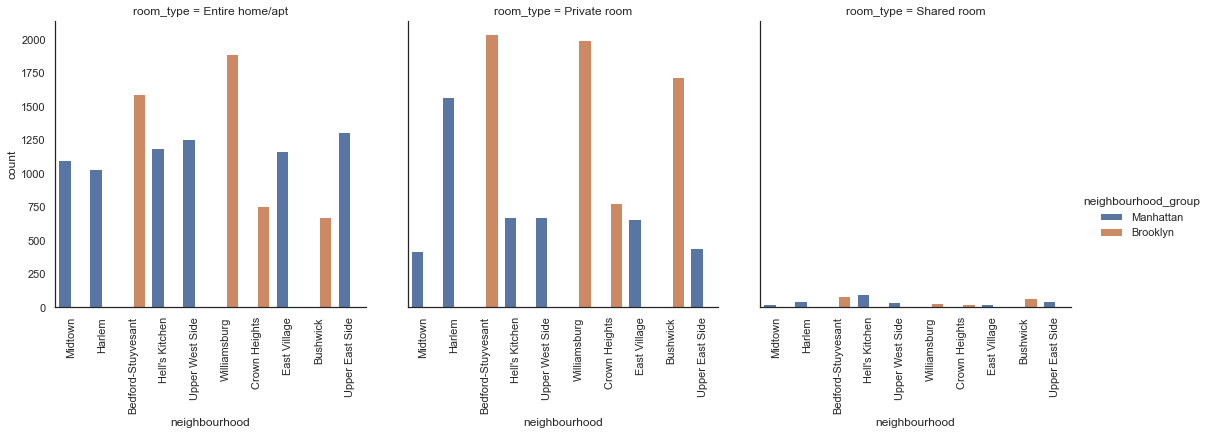

In [87]:
# filter the data that belongs to top 10 neighbourhood
sub_7 = airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
       'Upper West Side', 'Hell\'s Kitchen', 'East Village', 'Upper East Side',
       'Crown Heights', 'Midtown'])]
# create a catplot
viz_3 = sns.catplot(x='neighbourhood',hue='neighbourhood_group',col='room_type',data=sub_7,kind='count')
viz_3.set_xticklabels(rotation=90)

Great, let me explain about this plot. First, we have 3 subplots that had been grouped by room type. Based on two types of hue colour that only exist, we can say that the top 10 neighbourhood is concentrated in two neighbourhood group which are Manhattan and Brookyln. It was expected as Manhattan and Brooklyn are one of the most favorite travel destination in New York. We also can see that the majority of top 10 neighbourhood is categorized as either entire home/apt or private room. There is only small portion of shared room. Harlem is the most popular neighbourhood for Manhattan borough while Bedford-Stuyvesant and Williamsburg is the most favorite for Brooklyn.

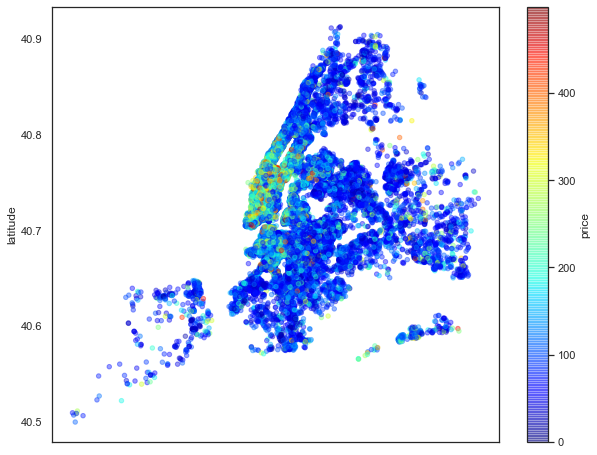

In [98]:
# create a scatter plot using longitude and latitude data to map price distibution
viz_4 = sub_6.plot(kind='scatter',x='longitude',y='latitude',c='price',cmap='jet',colorbar=True,alpha=0.4)

The scatter plot is working perfectly, let's continue for adding the map!

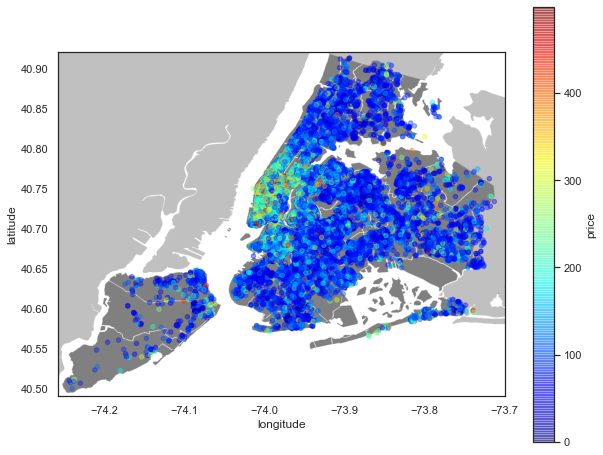

In [113]:
import urllib
# import the image from online source
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img = plt.imread(i)
# set the image position to fit with the scatter plot
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax = plt.gca()
# re-create the scatter plot
sub_6.plot(kind='scatter',x='longitude',y='latitude',c='price',cmap='jet',colorbar=True,alpha=0.4,zorder=5,ax=ax)

Amazing! We just make a price distibution map using longitude and latitude data. Different colour represents the variety of prices at different location. The map is matching with our previous analysis which show Manhattan borough as the most expensive location.

## ***Most Used Words for Naming the Airbnb***

In [122]:
# create empty list that hold the list of word of each airbnb name
names = []

# assign the already created list with the list of word of each airbnb name
for name in airbnb['name']:
    names.append(str(name).split())

# create the list that hold all of the words in the name column
words_for_count = []
for name in names:
    for word in name:
        word = word.lower()
        words_for_count.append(word)

In [124]:
# count the word
from collections import Counter
top_25_w = Counter(words_for_count).most_common()

In [126]:
# get top 25 word
top_25_w = top_25_w[0:25]

In [131]:
# transform the series into pandas dataframe
sub_w = pd.DataFrame(top_25_w)
sub_w.rename(columns={0:'Word',1:'Count'},inplace=True)

[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'of'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg')]

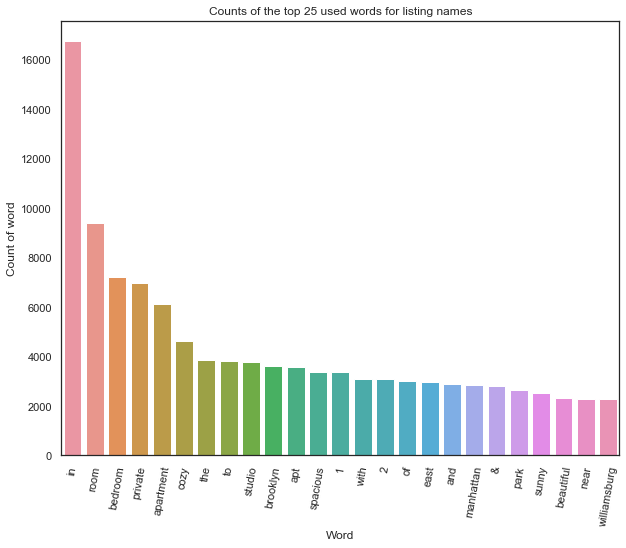

In [136]:
# vizualize the count using bar plot
viz_5 = sns.barplot(x='Word',y='Count',data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of word')
viz_5.set_xlabel('Word')
viz_5.set_xticklabels(viz_5.get_xticklabels(),rotation=80)

It seems that the hosts prefer using short and simple word for easier search by customers such as 'room', 'bedroom', 'private', and 'apartment'. They avoid using very specific word due to the variety of leanguage that the customers use.

In [137]:
# get top 10 reviewed listings
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [138]:
# get the mean
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


The top 10 reviewed listings have average price \\$65.4. The majority is categorized as private room.